In [91]:
#HIDDEN


from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np

import obspy
from obspy import read
import random
from obspy.geodetics import locations2degrees, gps2dist_azimuth
import obspy.signal.array_analysis as aa
import obspy.signal.util as su
from obspy import read
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp


#5th station - Central station
#Rotational components of 1st station in x, y and z direction
st5_curlx = read('/home/ashah/Desktop/3MayOutput/S5.curlx')
st5_curly = read('/home/ashah/Desktop/3MayOutput/S5.curly')
st5_curlz = read('/home/ashah/Desktop/3MayOutput/S5.curlz')

#Translation components of displacement in x, y and z direction
st5_x = read('/home/ashah/Desktop/3MayOutput/S5.x')
st5_y = read('/home/ashah/Desktop/3MayOutput/S5.y')
st5_z = read('/home/ashah/Desktop/3MayOutput/S5.z')

#Translation components of velocity in x, y and z direction
st5_xv = read('/home/ashah/Desktop/3MayOutput/S5.xv')
st5_yv = read('/home/ashah/Desktop/3MayOutput/S5.yv')
st5_zv = read('/home/ashah/Desktop/3MayOutput/S5.zv')


100
0.000109493967096
0.000109493967096
2000.0
63881.439721
1232.84199567


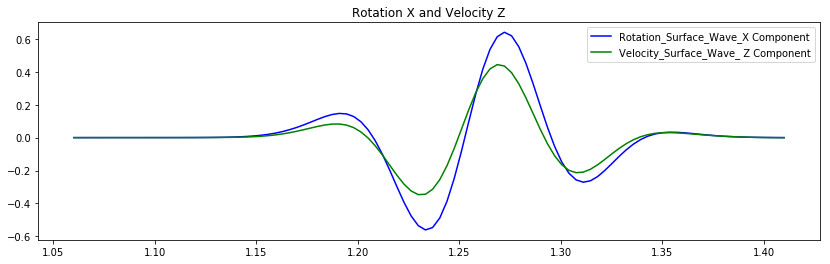

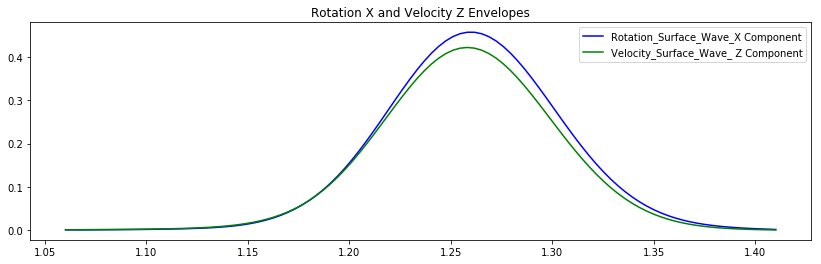

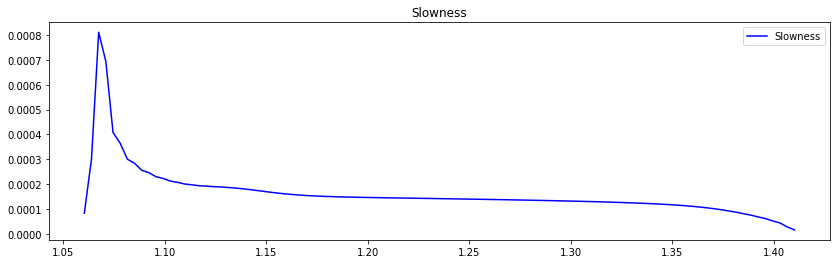

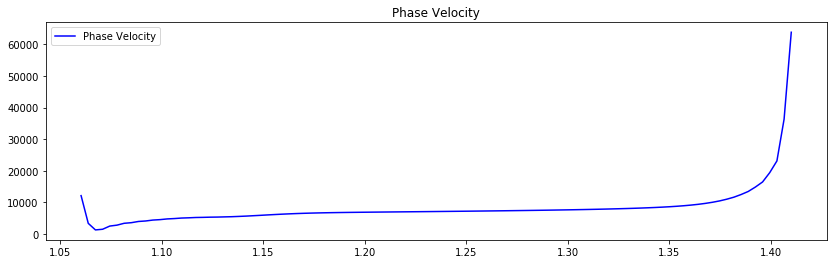

In [95]:
import math



#Transformed_Components_Rotation[abs(Transformed_Components_WI_Rotation) < tol] = 0.0
#Transformed_Components_Spud_Rotation[abs(Transformed_Components_WI_Rotation) < tol] = 0.0



st5_curlx_SurfaceWave = (st5_curlx[0].data[300:400])/2      #Surface Wave Rotations  X Component
st5_curlx_SurfaceWave_Hilbert = hilbert(st5_curlx_SurfaceWave)
amp_envlp_curlX_surface = np.abs(st5_curlx_SurfaceWave_Hilbert)


st5_times_SurfaceWave = st5_curlx[0].times()[300:400]      #Time Axis
st5_zv_SurfaceWave = -st5_zv[0].data[300:400]              #Surface Wave Velocity Z component
st5_zv_SurfaceWave_Hilbert = hilbert(st5_zv_SurfaceWave)
amp_envlp_velZ_surface = np.abs(st5_zv_SurfaceWave_Hilbert)
print(len(amp_envlp_curlX_surface))
print(min(amp_envlp_velZ_surface))

print(min(amp_envlp_velZ_surface))

#to1 = 3.01491554e-03
#to2 = 2e+3
print(to2)
Slowness = amp_envlp_curlX_surface/amp_envlp_velZ_surface     # (Rx)/(Vz)  # Slowness

PhaseVelocity = 1/Slowness  #*math.cos(45*180/math.pi)
#PhaseVelocity[abs(PhaseVelocity) < to2] = np.nan

#Slowness Vector

fig = plt.figure(figsize=(14,4))                          #Plotting Rotations Surface Wave X component
fig.add_subplot()
plt.plot(st5_times_SurfaceWave, st5_curlx_SurfaceWave*10800, color = 'b',label='Rotation_Surface_Wave_X Component')
plt.plot(st5_times_SurfaceWave, st5_zv_SurfaceWave, color = 'g',label='Velocity_Surface_Wave_ Z Component')
plt.legend()
plt.title("Rotation X and Velocity Z")

fig = plt.figure(figsize=(14,4))                          #Plotting Rotations Surface Wave X component
fig.add_subplot()
plt.plot(st5_times_SurfaceWave, amp_envlp_velZ_surface, color = 'b',label='Rotation_Surface_Wave_X Component')
plt.plot(st5_times_SurfaceWave, amp_envlp_curlX_surface*6666, color = 'g',label='Velocity_Surface_Wave_ Z Component')
plt.legend()
plt.title("Rotation X and Velocity Z Envelopes")


fig = plt.figure(figsize=(14,4))   #Plotting Slowness vector 
fig.add_subplot()
plt.plot(st5_times_SurfaceWave, Slowness, color = 'b',label='Slowness')  #
plt.legend()
plt.title("Slowness")

fig = plt.figure(figsize=(14,4))   #Plotting Phase Velocity vector 
fig.add_subplot()
plt.plot(st5_times_SurfaceWave, PhaseVelocity, color = 'b',label='Phase Velocity')
plt.legend()
plt.title("Phase Velocity")

print(max(PhaseVelocity))
print(min(PhaseVelocity))

In [98]:
print(Slowness)

[  8.26713045e-05   3.01491554e-04   8.11133952e-04   6.93362283e-04
   4.07785422e-04   3.64288685e-04   3.00253735e-04   2.83860930e-04
   2.55732016e-04   2.46027239e-04   2.29718574e-04   2.22679067e-04
   2.12082268e-04   2.07033274e-04   2.00287336e-04   1.97229744e-04
   1.93384695e-04   1.91877475e-04   1.89692997e-04   1.88569438e-04
   1.86474222e-04   1.84469608e-04   1.81438356e-04   1.78243264e-04
   1.74468028e-04   1.70794179e-04   1.67095741e-04   1.63769784e-04
   1.60730849e-04   1.58135651e-04   1.55894494e-04   1.54030147e-04
   1.52464093e-04   1.51165151e-04   1.50077276e-04   1.49156961e-04
   1.48370156e-04   1.47678619e-04   1.47064833e-04   1.46500439e-04
   1.45977930e-04   1.45478835e-04   1.45000322e-04   1.44531576e-04
   1.44071525e-04   1.43614544e-04   1.43159845e-04   1.42704863e-04
   1.42248762e-04   1.41790429e-04   1.41329111e-04   1.40863992e-04
   1.40394656e-04   1.39919993e-04   1.39440011e-04   1.38953016e-04
   1.38459390e-04   1.37957018e-04

In [99]:
print(PhaseVelocity)

[ 12096.09556302   3316.84250053   1232.84199567   1442.24747218
   2452.27010821   2745.07565707   3330.5164353    3522.85183627
   3910.34339502   4064.59059119   4353.15256161   4490.76787934
   4715.15139622   4830.14145475   4992.82690011   5070.22917591
   5171.04003177   5211.6591473    5271.67588697   5303.08629405
   5362.67150933   5420.94716433   5511.51379795   5610.31017651
   5731.70919797   5855.00047421   5984.59298535   6106.132498
   6221.58101542   6323.68472101   6414.59474486   6492.23555582
   6558.921396     6615.28133876   6663.23393875   6704.34685033
   6739.89991844   6771.46092959   6799.72212986   6825.91813186
   6850.35061654   6873.85213419   6896.53640712   6918.90333228
   6940.99684376   6963.08309441   6985.19897701   7007.4696656
   7029.93817175   7052.66222713   7075.68310175   7099.04629412
   7122.77823719   7146.94147677   7171.54275332   7196.67720514
   7222.3342756    7248.63449967   7275.5747932    7303.27655476
   7331.77908982   7361.1722